<a href="https://colab.research.google.com/github/maximdorogov/GDAL-Examples/blob/main/SAR_oil_spill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports


In [100]:
# using gdal for tiff files handling
from osgeo import gdal
import matplotlib.pyplot as plt
import glob
import numpy as np
import cv2

#Program start

## Loading dataset into memory

In [101]:
#load al tif files into a list of gdal datasets

dataset = []
folder_class = ["COVID-19 cases", "Pneumonia", "Normal "]


for j, dir in enumerate(glob.glob('/content/drive/MyDrive/GoogleCollab/Tesis_Maestria/BD_Derrames' +'/*.tif', recursive=True), 1):

  dataset.append(gdal.Open(dir, gdal.GA_ReadOnly) )

print('Qty of loaded images:', j)

Qty of loaded images: 11


Print some metadata

In [102]:
for img in dataset:
  print(img.GetDescription())
  print(img.GetMetadata_Dict())
  print('No. of raster bands:', img.RasterCount)
  print() 

/content/drive/MyDrive/GoogleCollab/Tesis_Maestria/BD_Derrames/RecortePesquero.tif
{'AREA_OR_POINT': 'Area', 'TIFFTAG_RESOLUTIONUNIT': '1 (unitless)', 'TIFFTAG_XRESOLUTION': '1', 'TIFFTAG_YRESOLUTION': '1'}
No. of raster bands: 1

/content/drive/MyDrive/GoogleCollab/Tesis_Maestria/BD_Derrames/16-08-18_RecortePesquero_peninsulavaldes.tif
{'AREA_OR_POINT': 'Area', 'TIFFTAG_RESOLUTIONUNIT': '1 (unitless)', 'TIFFTAG_XRESOLUTION': '1', 'TIFFTAG_YRESOLUTION': '1'}
No. of raster bands: 1

/content/drive/MyDrive/GoogleCollab/Tesis_Maestria/BD_Derrames/27-08-17-mardel.tif
{'AREA_OR_POINT': 'Area', 'TIFFTAG_IMAGEDESCRIPTION': '27-08-17-mardel', 'TIFFTAG_RESOLUTIONUNIT': '1 (unitless)', 'TIFFTAG_XRESOLUTION': '1', 'TIFFTAG_YRESOLUTION': '1'}
No. of raster bands: 1

/content/drive/MyDrive/GoogleCollab/Tesis_Maestria/BD_Derrames/26-08-2017usuahiA.tif
{'AREA_OR_POINT': 'Area', 'TIFFTAG_IMAGEDESCRIPTION': '26-08-2017usuahiA', 'TIFFTAG_RESOLUTIONUNIT': '1 (unitless)', 'TIFFTAG_XRESOLUTION': '1', 'TIFF

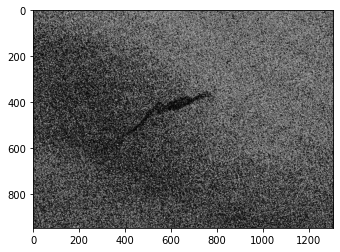

In [130]:
  
  band = dataset[3].GetRasterBand(1)
  arr = (band.ReadAsArray())

  norm_f = 8

  plt.imshow(np.uint8((arr/arr.max())*255*norm_f) , cmap = 'gray')

Lest plot the images

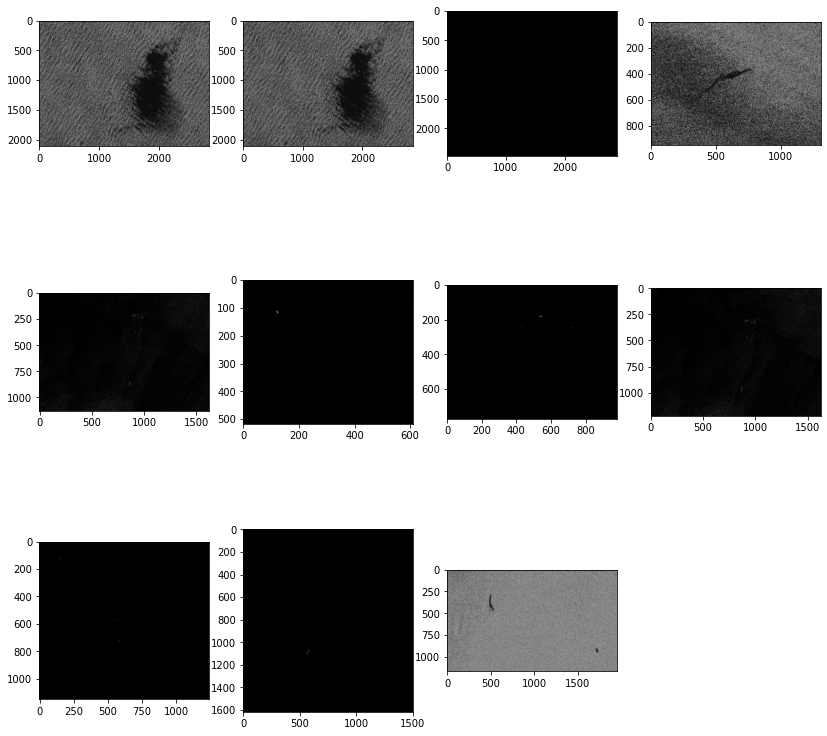

In [131]:
plt.figure(figsize=(14,14))

for i, ds in enumerate(dataset, 1):

  band1 = ds.GetRasterBand(1)
  arr = band1.ReadAsArray()

  #print('el maximo valor en la imagen original es', arr.max())
  # normalize values between 0 - 255
  
  arr_norm = np.uint8((arr / arr.max())*255*norm_f)

  '''
  for elem in arr_norm:
    print(elem)
  '''
  #print('el maximo valor al normalizar es',  arr_norm .max())
  plt.subplot(3,4,i)
  plt.imshow(arr_norm, cmap = 'gray')